In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\ADMIN\Downloads\PYTHON FILES\Deep_Learning\Assignments & Projects\WineQuality_Project\wine_quality_final.csv")
df.drop("Unnamed: 0",axis=1,inplace=True)
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,16.05,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6.0
1,white,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6.0
2,white,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6.0
3,white,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6.0
4,white,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,red,6.8,0.620,0.08,1.90,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6.0
5325,red,6.2,0.600,0.08,2.00,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
5326,red,5.9,0.550,0.10,2.20,0.062,39.0,51.0,0.99512,3.52,0.50,11.2,6.0
5327,red,5.9,0.645,0.12,2.00,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


In [3]:
df.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
dtype: object

### Identifying the Input and Output Features

In [4]:
df.head(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,16.05,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,white,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6.0


In [5]:
y=df['quality']
X=df.drop(columns=['quality'])

 ### Spliting the data into train and test

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)  

In [7]:
y.value_counts()

6.0    2327
5.0    1755
7.0     857
4.0     206
7.5     154
3.5      30
Name: quality, dtype: int64

In [8]:
print(X_train.shape)
print(y_train.shape)

(4263, 12)
(4263,)


###  Dividing Numerical and categorical columns

In [9]:
X_train_num=X_train.select_dtypes(include=['int32','float64'])
X_train_num.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2039,7.6,0.285,0.32,14.6,0.063,32.0,201.0,0.99800,3.00,0.45,9.2
4924,6.3,0.470,0.00,1.4,0.055,27.0,33.0,0.99220,3.45,0.48,12.3
1581,7.4,0.210,0.27,7.3,0.031,41.0,144.0,0.99320,3.15,0.38,11.8
2753,6.7,0.180,0.24,10.3,0.057,64.0,185.0,0.99519,3.12,0.50,10.6
3493,7.4,0.160,0.33,1.2,0.042,47.0,121.0,0.99198,3.04,0.68,10.5


In [10]:
X_train_cat=X_train.select_dtypes(include=['object'])
X_train_cat.head()

,type
2039,white
4924,red
1581,white
2753,white
3493,white


In [11]:
X_test_num=X_test.select_dtypes(include=['int32','float64'])
X_test_num.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2014,8.0,0.27,0.25,16.05,0.045,50.0,208.0,1.00051,3.05,0.50,9.2
3492,6.3,0.28,0.22,11.50,0.036,27.0,150.0,0.99445,3.00,0.33,10.6
826,7.6,0.30,0.25,4.30,0.054,22.0,111.0,0.99560,3.12,0.49,9.2
723,6.7,0.22,0.39,10.20,0.038,60.0,149.0,0.99725,3.17,0.54,10.0
4528,7.8,0.64,0.10,6.00,0.108,5.0,11.0,0.99840,3.37,0.69,10.1


In [12]:
X_test_cat=X_test.select_dtypes(include=['object'])
X_test_cat.head()

,type
2014,white
3492,white
826,white
723,white
4528,red


### Data Preprocessing

In [13]:
# One hot Encoding
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(drop='first',sparse=False)
#To numpy array
X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat), 
                               columns=encoder.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)
X_train_cat_ohe.head()

,type_white
2039,1.0
4924,0.0
1581,1.0
2753,1.0
3493,1.0


In [14]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first',sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_test_cat_ohe = pd.DataFrame(encoder.fit_transform(X_test_cat), 
                               columns=encoder.get_feature_names_out(X_test_cat.columns), 
                               index = X_test_cat.index)

X_test_cat_ohe.head()

,type_white
2014,1.0
3492,1.0
826,1.0
723,1.0
4528,0.0


In [15]:
X_train_transformed=pd.concat([X_train_cat_ohe,X_train_num],axis=1)
X_train_transformed.head()

,type_white,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2039,1.0,7.6,0.285,0.32,14.6,0.063,32.0,201.0,0.99800,3.00,0.45,9.2
4924,0.0,6.3,0.470,0.00,1.4,0.055,27.0,33.0,0.99220,3.45,0.48,12.3
1581,1.0,7.4,0.210,0.27,7.3,0.031,41.0,144.0,0.99320,3.15,0.38,11.8
2753,1.0,6.7,0.180,0.24,10.3,0.057,64.0,185.0,0.99519,3.12,0.50,10.6
3493,1.0,7.4,0.160,0.33,1.2,0.042,47.0,121.0,0.99198,3.04,0.68,10.5


In [16]:
X_test_transformed=pd.concat([X_test_cat_ohe,X_test_num],axis=1)
X_test_transformed.head()

,type_white,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2014,1.0,8.0,0.27,0.25,16.05,0.045,50.0,208.0,1.00051,3.05,0.50,9.2
3492,1.0,6.3,0.28,0.22,11.50,0.036,27.0,150.0,0.99445,3.00,0.33,10.6
826,1.0,7.6,0.30,0.25,4.30,0.054,22.0,111.0,0.99560,3.12,0.49,9.2
723,1.0,6.7,0.22,0.39,10.20,0.038,60.0,149.0,0.99725,3.17,0.54,10.0
4528,0.0,7.8,0.64,0.10,6.00,0.108,5.0,11.0,0.99840,3.37,0.69,10.1


In [17]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_train=std.fit_transform(X_train_transformed)
x_test=std.transform(X_test_transformed)

##  Build the Logical Structure

In [18]:
x_train.shape

(4263, 12)

In [19]:
x_test.shape

(1066, 12)

In [20]:
# from keras import Sequential 
# from keras.layers import Dense, BatchNormalization 
# from keras.regularizers import L1,L2,L1L2 
# from keras.optimizers import SGD 

In [21]:
# model=Sequential()
# model.add(Dense(50,activation="relu",kernel_regularizer=L2(0.01),bias_regularizer=L2(0.01),input_dim=12))
# model.add(Dense(40,activation="relu",kernel_regularizer=L2(0.01),bias_regularizer=L2(0.01)))
# # model.add(BatchNormalization())
# model.add(Dense(25,activation="relu",kernel_regularizer=L2(0.01),bias_regularizer=L2(0.01)))
# model.add(Dense(16,activation="relu",kernel_regularizer=L2(0.01),bias_regularizer=L2(0.01)))
# model.add(Dense(8,activation="relu",kernel_regularizer=L2(0.01),bias_regularizer=L2(0.01)))
# model.add(Dense(1,activation="softmax",kernel_regularizer=L2(0.01),bias_regularizer=L2(0.01))) 

In [22]:
# model.summary()   

##### Compiling

In [23]:
# model.compile(loss="mse",optimizer="sgd",metrics=["mse"])

In [24]:
# plt.plot(range(1,81),hist.history["mse"],label="training")
# plt.plot(range(1,81),hist.history["val_mse"],label="validation")
# plt.legend()

In [25]:
# hist=model.fit(X_train_transformed,y_train,batch_size=20,epochs=80,validation_split=0.1)

### Keras_Tuner

In [26]:
from keras import Sequential 
from keras.layers import Dense, BatchNormalization 
from keras.regularizers import L1,L2,L1L2 
from keras.optimizers import SGD 

import keras_tuner as k
from keras.layers import Dense,Dropout,BatchNormalization,Input
from keras.initializers import Zeros,Ones,GlorotNormal,GlorotUniform,HeNormal,HeUniform,RandomNormal,RandomUniform

Using TensorFlow backend


In [27]:
# # 01.Creating function
# def models(hp):
#     model=Sequential()
#     model.add(Input(shape=(12,)))
#     model.add(Dense(256,activation=hp.Choice("activation" ,values=["sigmoid","tanh","relu"])))
#     model.add(Dense(180,activation=hp.Choice("activation" ,values=["sigmoid","tanh","relu"])))
#     model.add(Dense(120,activation=hp.Choice("activation" ,values=["sigmoid","tanh","relu"])))
#     model.add(Dense(50,activation=hp.Choice("activation" ,values=["sigmoid","tanh","relu"])))
#     model.add(Dense(10,activation=hp.Choice("activation" ,values=["sigmoid","tanh","relu"])))
#     model.add(Dense(1,activation="linear"))
#     model.compile(loss="mse",optimizer="sgd",metrics=["mse"])
#     return model

In [28]:
def modelss(hp):
    model = Sequential()
    model.add(Input(shape=(12,)))
    for i in range(hp.Int("hidden_layers", min_value=5, max_value=30, step=2)):
        model.add(Dense(units=hp.Int("neurons{}".format(i), min_value=4, max_value=50, step=1),
                        activation="relu"))
        model.add(BatchNormalization())
        
    model.add(Dense(1, activation="linear"))
    model.compile(
    optimizer=hp.Choice("optimizer", ["sgd", "adam", "adadelta", "rmsprop"]),loss="mse",metrics=["mse"]
    )
    return model

In [29]:
tuner=k.RandomSearch(modelss,objective="val_loss",max_trials=10,directory=r"C:\\Users\\ADMIN\\Downloads\\PYTHON FILES\\Deep_Learning\\Assignments & Projects\\WineQuality_Project\\Wine_quality_keras_tuner", project_name='f1')

In [30]:
y_train

2039    5.0
4924    6.0
1581    7.0
2753    6.0
3493    7.0
       ... 
176     4.0
414     7.0
3577    5.0
3603    5.0
208     6.0
Name: quality, Length: 4263, dtype: float64

In [31]:
tuner.search(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Trial 10 Complete [00h 00m 29s]
val_loss: 0.6128973364830017

Best val_loss So Far: 0.49101385474205017
Total elapsed time: 00h 06m 08s


In [32]:
tuner.results_summary()

Results summary
Results in C:\\Users\\ADMIN\\Downloads\\PYTHON FILES\\Deep_Learning\\Assignments & Projects\\WineQuality_Project\\Wine_quality_keras_tuner\f1
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 07 summary
Hyperparameters:
hidden_layers: 5
neurons0: 36
neurons1: 49
neurons2: 12
neurons3: 22
neurons4: 28
optimizer: rmsprop
neurons5: 38
neurons6: 18
neurons7: 9
neurons8: 33
neurons9: 10
neurons10: 23
neurons11: 34
neurons12: 34
neurons13: 18
neurons14: 8
neurons15: 20
neurons16: 23
neurons17: 19
neurons18: 42
neurons19: 4
neurons20: 27
neurons21: 19
neurons22: 42
neurons23: 20
neurons24: 49
neurons25: 7
neurons26: 38
Score: 0.49101385474205017

Trial 03 summary
Hyperparameters:
hidden_layers: 15
neurons0: 35
neurons1: 38
neurons2: 45
neurons3: 34
neurons4: 43
optimizer: rmsprop
neurons5: 43
neurons6: 11
neurons7: 25
neurons8: 34
neurons9: 5
neurons10: 46
neurons11: 19
neurons12: 48
neurons13: 44
neurons14: 36
neurons15: 44
neurons16: 34
neurons17: 47


In [33]:
tuner.search_space_summary()

Search space summary
Default search space size: 29
hidden_layers (Int)
{'default': None, 'conditions': [], 'min_value': 5, 'max_value': 30, 'step': 2, 'sampling': 'linear'}
neurons0 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 50, 'step': 1, 'sampling': 'linear'}
neurons1 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 50, 'step': 1, 'sampling': 'linear'}
neurons2 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 50, 'step': 1, 'sampling': 'linear'}
neurons3 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 50, 'step': 1, 'sampling': 'linear'}
neurons4 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 50, 'step': 1, 'sampling': 'linear'}
optimizer (Choice)
{'default': 'sgd', 'conditions': [], 'values': ['sgd', 'adam', 'adadelta', 'rmsprop'], 'ordered': False}
neurons5 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 50, 'step': 1, 'sampling': 'linear'}
n

In [34]:
fmodel = tuner.get_best_models(num_models=1)[0]

In [35]:
fmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 36)                468       
                                                                 
 batch_normalization (Batch  (None, 36)                144       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 49)                1813      
                                                                 
 batch_normalization_1 (Bat  (None, 49)                196       
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 12)                600       
                                                                 
 batch_normalization_2 (Bat  (None, 12)                4

In [36]:
tuner.get_best_hyperparameters()[0].values

{'hidden_layers': 5,
 'neurons0': 36,
 'neurons1': 49,
 'neurons2': 12,
 'neurons3': 22,
 'neurons4': 28,
 'optimizer': 'rmsprop',
 'neurons5': 38,
 'neurons6': 18,
 'neurons7': 9,
 'neurons8': 33,
 'neurons9': 10,
 'neurons10': 23,
 'neurons11': 34,
 'neurons12': 34,
 'neurons13': 18,
 'neurons14': 8,
 'neurons15': 20,
 'neurons16': 23,
 'neurons17': 19,
 'neurons18': 42,
 'neurons19': 4,
 'neurons20': 27,
 'neurons21': 19,
 'neurons22': 42,
 'neurons23': 20,
 'neurons24': 49,
 'neurons25': 7,
 'neurons26': 38}

In [37]:
hist=fmodel.fit(x_train,y_train,batch_size=20,epochs=25,validation_split=0.1)

Epoch 1/25
192/192 [==============================] - 5s 9ms/step - loss: 0.5213 - mse: 0.5213 - val_loss: 0.4014 - val_mse: 0.4014
Epoch 2/25
192/192 [==============================] - 1s 6ms/step - loss: 0.5079 - mse: 0.5079 - val_loss: 0.4005 - val_mse: 0.4005
Epoch 3/25
192/192 [==============================] - 1s 6ms/step - loss: 0.5147 - mse: 0.5147 - val_loss: 0.4321 - val_mse: 0.4321
Epoch 4/25
192/192 [==============================] - 1s 7ms/step - loss: 0.4894 - mse: 0.4894 - val_loss: 0.4252 - val_mse: 0.4252
Epoch 5/25
192/192 [==============================] - 1s 8ms/step - loss: 0.4843 - mse: 0.4843 - val_loss: 0.4058 - val_mse: 0.4058
Epoch 6/25
192/192 [==============================] - 1s 7ms/step - loss: 0.4937 - mse: 0.4937 - val_loss: 0.4067 - val_mse: 0.4067
Epoch 7/25
192/192 [==============================] - 1s 6ms/step - loss: 0.4862 - mse: 0.4862 - val_loss: 0.4173 - val_mse: 0.4173
Epoch 8/25
192/192 [==============================] - 1s 7ms/step - loss: 0.

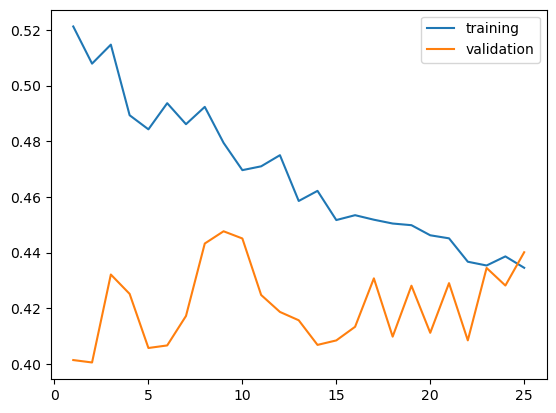

In [38]:
plt.plot(range(1,26),hist.history["mse"],label="training")
plt.plot(range(1,26),hist.history["val_mse"],label="validation")
plt.legend()